In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle
from scipy.interpolate import interp1d
import time
from matplotlib import rcParams
import h5py as h5
from astropy.io import fits

def darken_color(color, factor=0.65):
    rgb = mcolors.to_rgb(color)
    return tuple(factor * c for c in rgb)

from matplotlib import colors as mcolors



Text(0, 0.5, 'PDF')

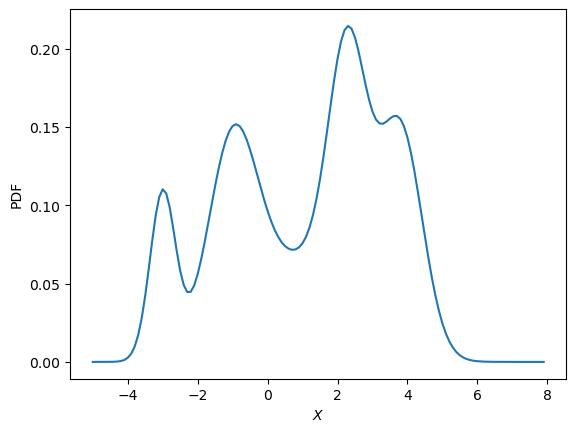

In [4]:
def Gauss(x,mu,sig2):
    return np.exp(-(x-mu)**2/2/sig2)/np.sqrt(sig2)
    
X=[-5+k/10 for k in range(130)]
sig=0.5
mu=-1
G1=np.array([Gauss(x,mu,sig) for x in X])
sig=0.3
mu=2.3
G2=np.array([Gauss(x,mu,sig) for x in X])
sig=2
mu=1
G3=np.array([Gauss(x,mu,sig) for x in X])
sig=0.4
mu=3.8
G4=np.array([Gauss(x,mu,sig) for x in X])

sig=0.4
mu=-3
G5=0.3*np.array([Gauss(x,mu,sig)**3 for x in X])

G=G1+G2+(G3)+G4+G5
norm=np.sum(G)*0.1
G=G/norm

CDF_X=np.copy(X)
for i in range(len(X)):
    cdf=np.sum(G[:i])
    CDF_X[i]=cdf*0.1

plt.plot(X,G)
plt.xlabel(r'$X$')
plt.ylabel(r'PDF')

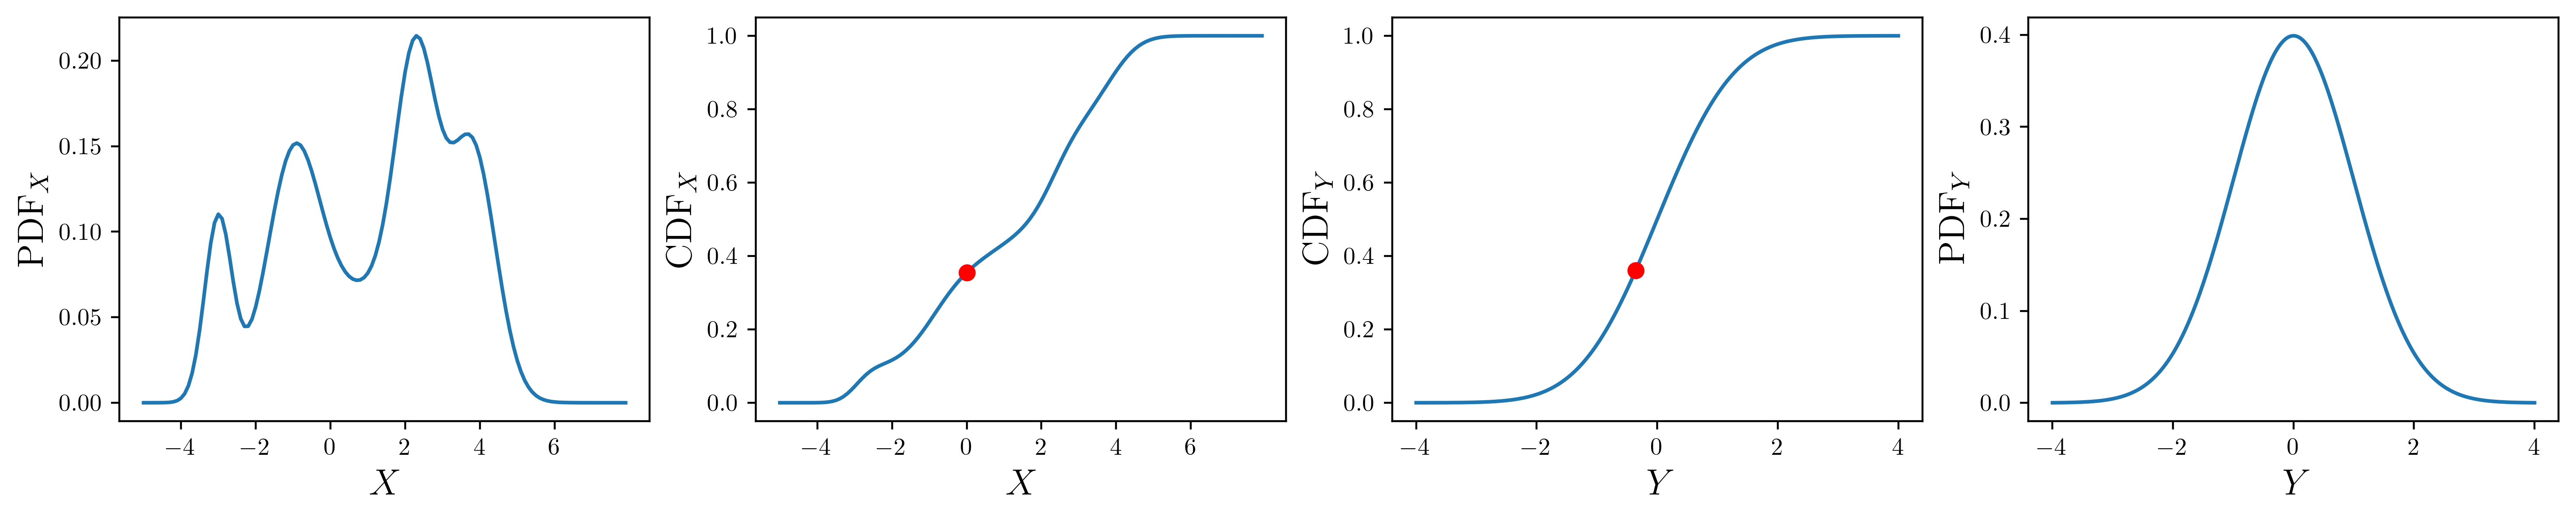

In [5]:
import os
os.environ["PATH"] += ":/global/common/software/nersc9/texlive/2024/bin/x86_64-linux"
plt.rcParams.update({
    "text.usetex": True,
    "font.family": 'serif'
})
fig,ax=plt.subplots(1,4, figsize=(18, 3),dpi=400)


ax[0].plot(X,G, linewidth=1.5)
ax[0].set_xlabel(r'$X$',fontsize=15)
ax[0].set_ylabel(r'PDF$_X$',fontsize=15)

ax[1].plot(X,CDF_X, linewidth=1.5)

ax[1].set_xlabel(r'$X$',fontsize=15)
ax[1].set_ylabel('CDF$_X$',fontsize=15)

ax[2].set_xlabel(r'$Y$',fontsize=15)
ax[2].set_ylabel('CDF$_Y$',fontsize=15)

ax[3].set_xlabel(r'$Y$',fontsize=15)
ax[3].set_ylabel('PDF$_Y$',fontsize=15)




import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Parameters of the Gaussian
mu = 0       # mean
sigma = 1    # standard deviation
# x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# PDF and CDF
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

ax[3].plot(x, pdf, linewidth=1.5)
ax[2].plot(x, cdf, linewidth=1.5)


ax[1].plot(X[50],CDF_X[50], marker='o',color='red')
ind=455
ax[2].plot(x[ind],cdf[ind], marker='o',color='red')

ax[1].set_xticks([-4,-2,0,2,4,6])
ax[0].set_xticks([-4,-2,0,2,4,6])

plt.savefig('example_1d_coord_transf.png',bbox_inches='tight')

In [17]:
    
X1=[-5+k/100 for k in range(1300)]
X2=[-5+k/100 for k in range(1300)]
dx=0.01


sig1=5
sig2=1
mu1=-3
mu2=2

notG1=np.array([[(np.exp(-(-(x1*x2)-mu1)**2/sig1)/sig1)*np.exp(-(x2-mu2)**2/sig2)/sig2 for x1 in X1] for x2 in X2])


sig1=5
sig2=1
mu1=-1
mu2=4

notG2=np.array([[(np.exp(-(-(x1*x2)-mu1)**2/sig1)/sig1)*np.exp(-(x2-mu2)**2/sig2)/sig2 for x1 in X1] for x2 in X2])


notG=notG1+notG2


norm=np.sum(notG)*dx**2
notG=notG/norm

sig1=1
sig2=1
mu1=3
mu2=3
G=np.array([[(np.exp(-(x1-mu1)**2/sig1)/sig1)*np.exp(-(x2-mu2)**2/sig2)/sig2 for x1 in X1] for x2 in X2])

norm=np.sum(G)*dx**2
G=G/norm




CDF_X1=np.copy(X1)
CDF_X2cX1=np.copy(notG)



for i in range(len(X1)):
    cdf=np.sum(notG[:i,:])
    CDF_X1[i]=cdf*0.1**2
    
for i1 in range(len(X1)):
    norm=np.sum(notG[i1,:])
    for i2 in range(len(X2)):
        cdf=np.sum(notG[i1,:i2])
        CDF_X2cX1[i1,i2]=cdf/norm
        
        if CDF_X2cX1[i1,i2]>1:
            CDF_X2cX1[i1,i2]=1


        
CDFG_X1=np.copy(X1)
CDFG_X2cX1=np.copy(notG)



for i in range(len(X1)):
    cdf=np.sum(G[:,:i])
    CDFG_X1[i]=cdf*0.1**2
    
for i1 in range(len(X1)):
    norm=np.sum(G[i1,:])
    for i2 in range(len(X2)):
        cdf=np.sum(G[i1,:i2])
        CDFG_X2cX1[i1,i2]=cdf/norm

        

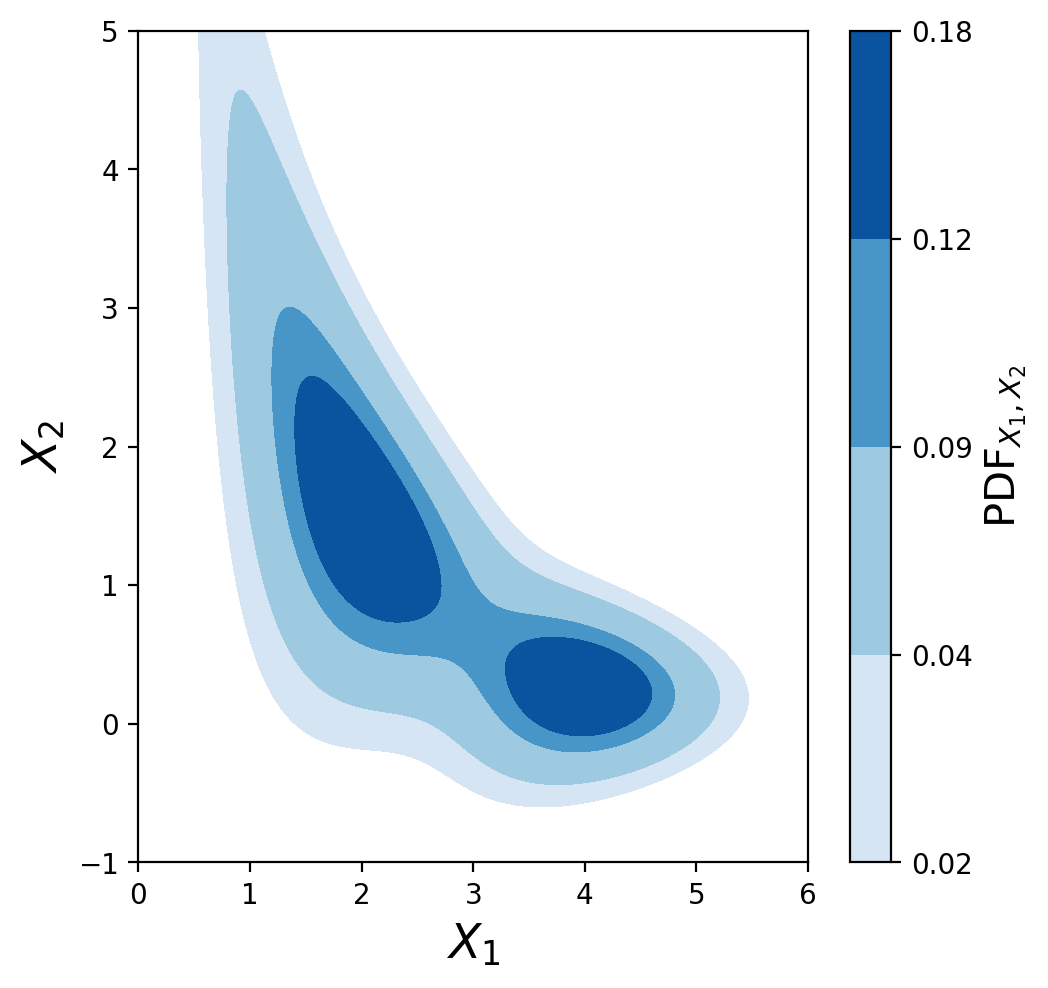

In [28]:
x1lim=[0,6]
x2lim=[-1,5]


plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])
levels = np.array([round(np.max(notG)/8,2),round(np.max(notG)/4,2),round(np.max(notG)/2,2),round(np.max(notG)/1.5,2),round(np.max(notG)+0.01,2)])

cpf = ax.contourf(X1,X2, np.transpose(notG), len(levels), levels=levels, cmap='Blues',vmin=0, vmax=np.max(notG))

#ax.set_xticks([0.6,0.7,0.8,0.9])
#ax.set_xlabel('$z_i$',fontsize=17)
#ax.set_ylabel(r'$r_{\rm p}$ in Mpc',fontsize=17)
cb=plt.colorbar(cpf)
cb.set_label(label='PDF$_{X_1,X_2}$', fontsize=15)#, weight='bold')

ax.set_xlim(x1lim)
ax.set_ylim(x2lim)
#plt.savefig('Bias_ratio_bin1_LRGELG_pretty.pdf',bbox_inches="tight")

ax.set_xlabel('$X_1$',fontsize=17)
ax.set_ylabel('$X_2$',fontsize=17)
plt.savefig('pdf_x1x2.png',bbox_inches='tight')

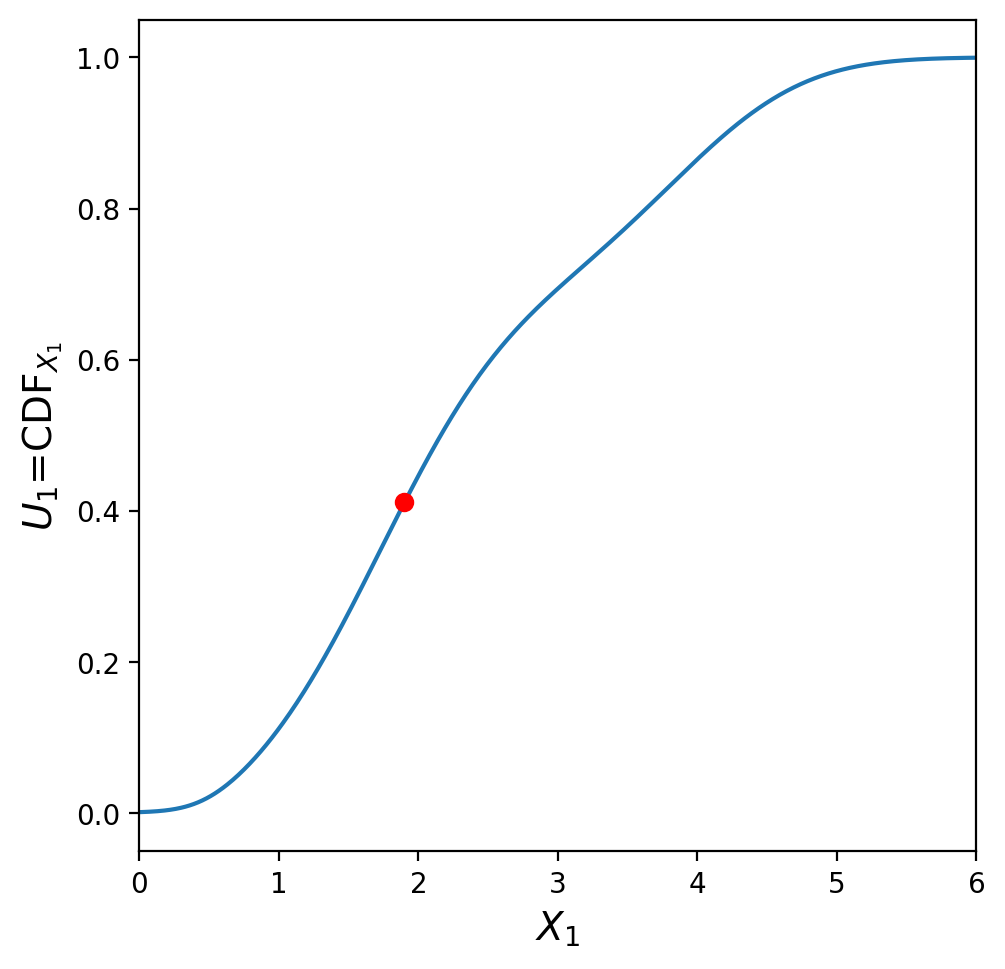

In [25]:
plt.figure(dpi=200)
plt.plot(X1,CDF_X1/100)
plt.ylabel('$U_1$=CDF$_{X_1}$',fontsize=14)
plt.xlabel(r'$X_1$',fontsize=14)
plt.xlim(x1lim)
ind=690
plt.plot(X1[ind],CDF_X1[ind]/100, marker='o',color='red')
plt.savefig('U1_X1.png',bbox_inches='tight')

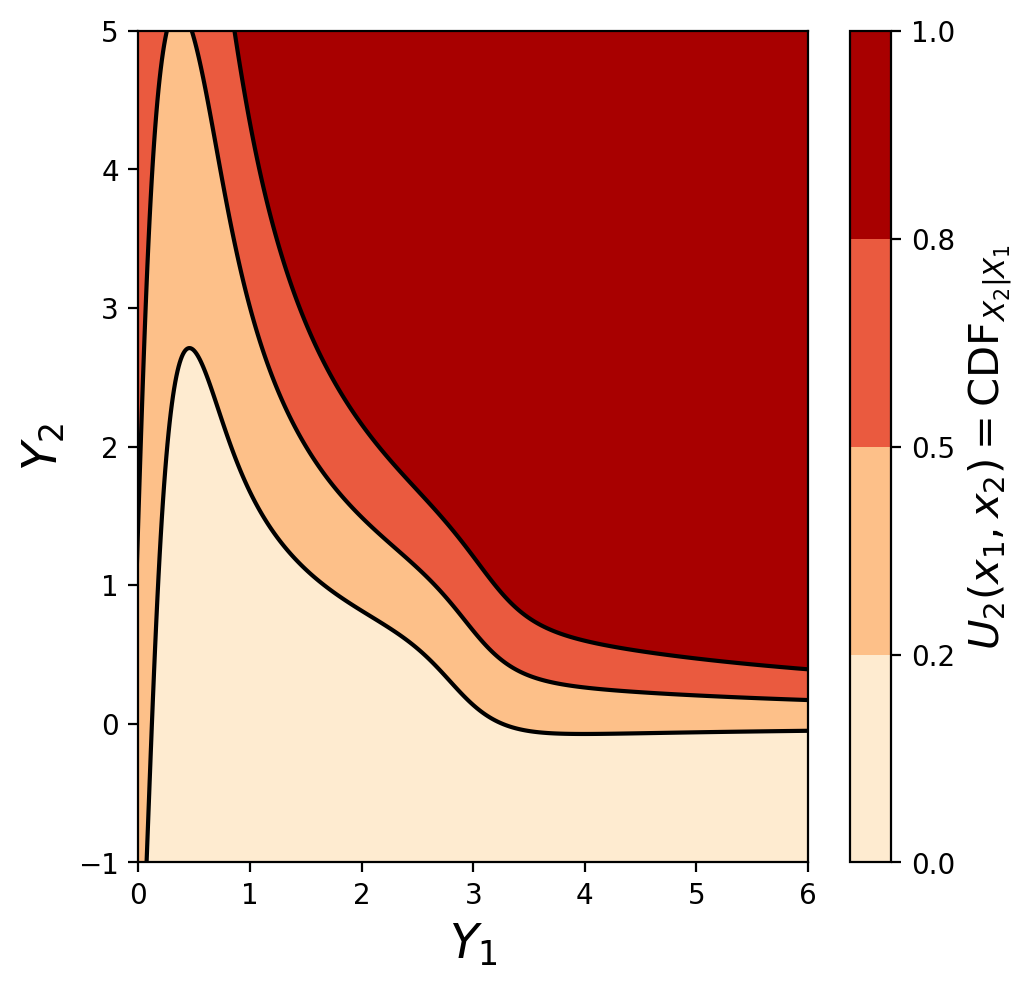

In [29]:
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])
levels = np.array([0,0.2,0.5,0.8,1])

cpf = ax.contourf(X1,X2, np.transpose(CDF_X2cX1), len(levels), levels=levels, cmap='OrRd',vmin=0, vmax=1.)

#ax.set_xticks([0.6,0.7,0.8,0.9])
#ax.set_xlabel('$z_i$',fontsize=17)
#ax.set_ylabel(r'$r_{\rm p}$ in Mpc',fontsize=17)
cb=plt.colorbar(cpf)
cb.set_label(label=r'$U_2(x_1,x_2)=$CDF$_{X_2 \vert X_1}$', fontsize=15)#, weight='bold')


ax.set_xlim(x1lim)
ax.set_ylim(x2lim)

ax.set_xlabel('$Y_1$',fontsize=17)
ax.set_ylabel('$Y_2$',fontsize=17)

line_colors = ['black' for l in cpf.levels]
cp = ax.contour(X1,X2, np.transpose(CDF_X2cX1), levels=levels, colors=line_colors)
plt.savefig('U2_X2X1.png',bbox_inches='tight')

In [307]:
1

1

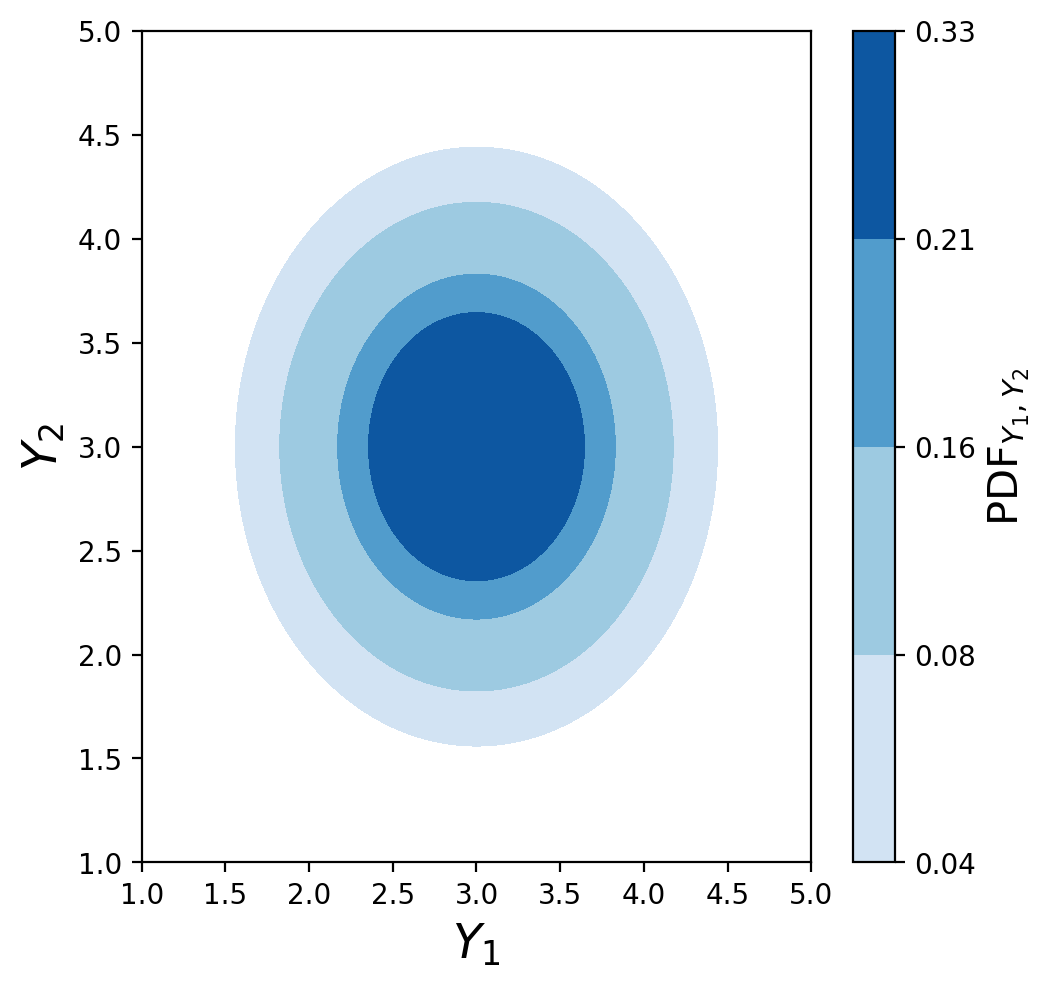

In [30]:
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])
levels = np.array([round(np.max(G)/8,2),round(np.max(G)/4,2),round(np.max(G)/2,2),round(np.max(G)/1.5,2),round(np.max(G)+0.01,2)])

cpf = ax.contourf(X1,X2, G, len(levels), levels=levels, cmap='Blues',vmin=0, vmax=np.max(G))

#ax.set_xticks([0.6,0.7,0.8,0.9])
#ax.set_xlabel('$z_i$',fontsize=17)
#ax.set_ylabel(r'$r_{\rm p}$ in Mpc',fontsize=17)
cb=plt.colorbar(cpf)
cb.set_label(label='PDF$_{Y_1,Y_2}$', fontsize=15)#, weight='bold')

ax.set_xlim(1,5)
ax.set_ylim(1,5)
#plt.savefig('Bias_ratio_bin1_LRGELG_pretty.pdf',bbox_inches="tight")

ax.set_xlabel('$Y_1$',fontsize=17)
ax.set_ylabel('$Y_2$',fontsize=17)

plt.savefig('pdf_Y1Y2.png',bbox_inches='tight')

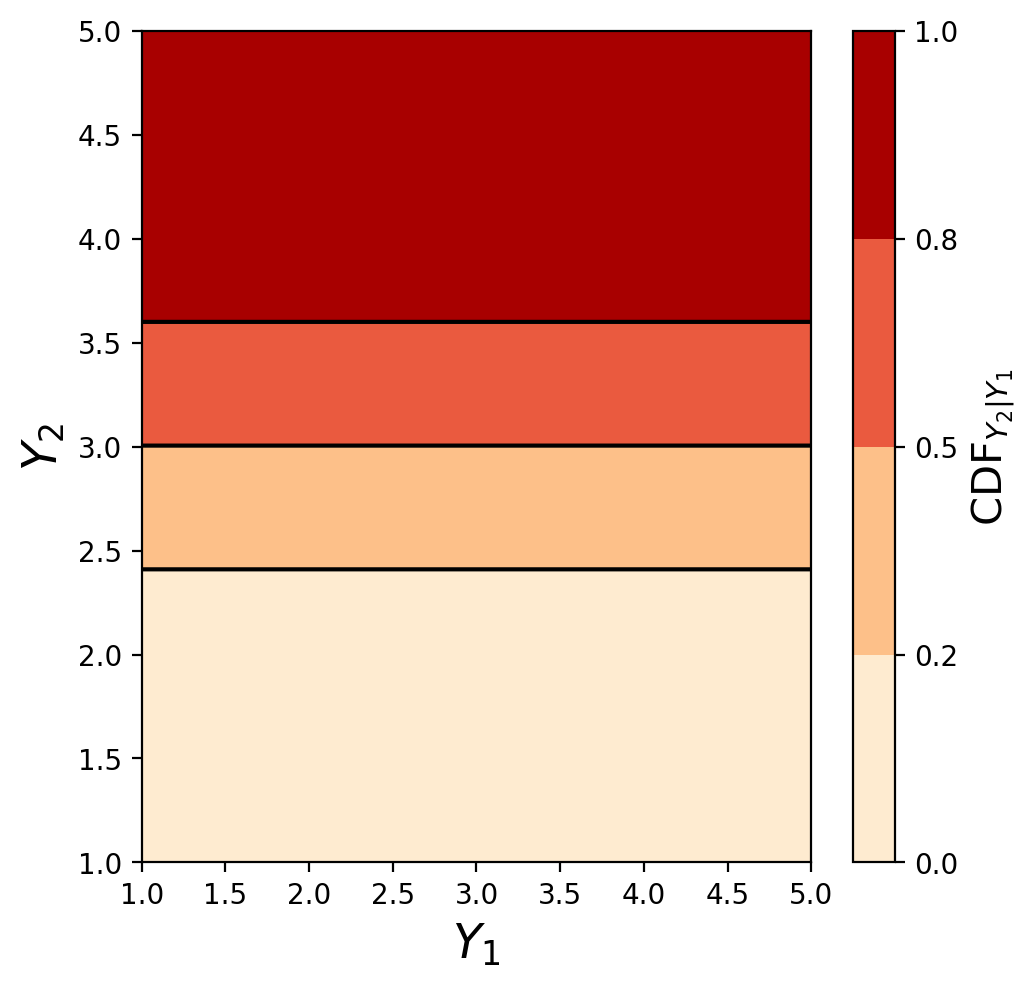

In [31]:
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])
levels = np.array([0,0.2,0.5,0.8,1])

cpf = ax.contourf(X1,X2, np.transpose(CDFG_X2cX1), len(levels), levels=levels, cmap='OrRd',vmin=0, vmax=1)

#ax.set_xticks([0.6,0.7,0.8,0.9])
#ax.set_xlabel('$z_i$',fontsize=17)
#ax.set_ylabel(r'$r_{\rm p}$ in Mpc',fontsize=17)
cb=plt.colorbar(cpf)
cb.set_label(label=r'CDF$_{Y_2 \vert Y_1}$', fontsize=15)#, weight='bold')

ax.set_xlim(1,5)
ax.set_ylim(1,5)


#plt.savefig('Bias_ratio_bin1_LRGELG_pretty.pdf',bbox_inches="tight")

ax.set_xlabel('$Y_1$',fontsize=17)
ax.set_ylabel('$Y_2$',fontsize=17)


line_colors = ['black' for l in cpf.levels]
cp = ax.contour(X1,X2, np.transpose(CDFG_X2cX1), levels=levels, colors=line_colors)

plt.savefig('CDF_Y2Y1.png',bbox_inches='tight')

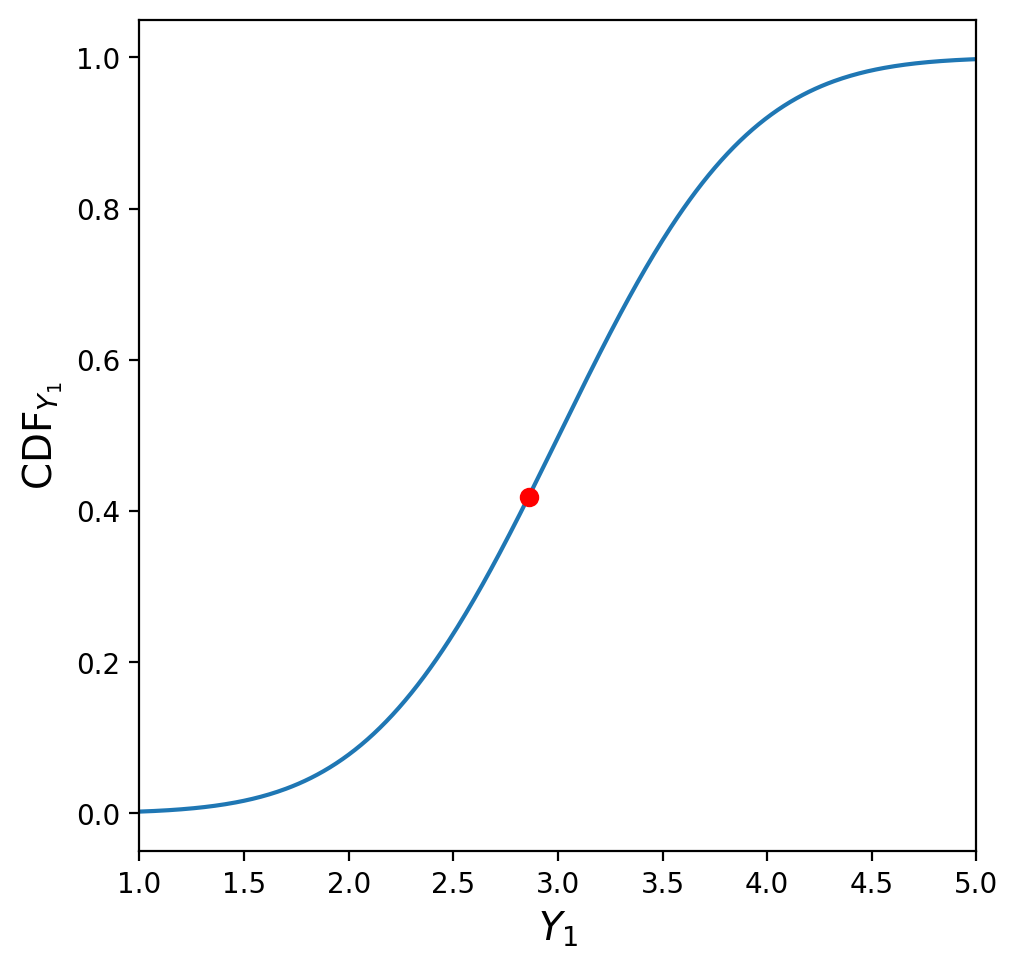

In [366]:
plt.figure(dpi=200)
plt.plot(X1,CDFG_X1/100)
plt.ylabel('CDF$_{Y_1}$',fontsize=14)
plt.xlabel(r'$Y_1$',fontsize=14)
plt.xlim(1,5)
ind=786
plt.plot(X1[ind],CDFG_X1[ind]/100, marker='o',color='red')
plt.savefig('CDF_Y1.png',bbox_inches='tight')